# SAI - I 트리케라톱스 팀

실습 코드

- 교재, <케라스 창시자에게 배우는 딥러닝> 4장
- 코드가 별로 없어서 일단 교재 읽으면서 개념 정리도 함께 하도록 하겠음



## 머신 러닝의 네가지 분류
1. 지도학습
 - 샘플 데이터가 주어지면 미리 만들어진 정답표를 이용해 입력 데이터를 매핑하는 학습 방법
2. 비지도학습
 - 타깃 없이 입력 데이터에 대한 변환을 찾음.데이터 간의 상관관계를 묶거나 노이즈를 제거하는 데 쓰는 편.
3. 자기 지도 학습
 - 사람이 만든 레이블을 사용하지 않음. 레이블은 입력 데이터로부터 알아서 생성함.
 - 오토인코더가 자기 지도 학습의 예라고 함.
4. 강화학습
 - 게임인공지능 쪽에서 두각을 드러냄.
 - 환경에 대한 정보를 받아서 보상을 최대화하는 행동을 하도록 학습함.

## 머신 러닝 모델 평가

- 목표: 과적합을 완화하여 일반화된 모델 얻기

### 훈련, 검증, 테스트 세트
- 그냥 단순히 훈련 / 테스트로 나누겠다고 생각할 수 있지만, 하이퍼 파라미터를 튜닝하기 위해서 검증 세트가 필요하다.
- 그런데 검증 세트에서의 결과를 참고하며 튜닝하다보면 검증 세트에 대해 과대적합이 일어날 수도 있다. 직접적으로 검증 세트의 데이터를 이용해서 파라미터 갱신을 하지 않지만, 하이퍼파라미터를 조율할 때마다 검증 세트에 대한 (간접적인) **정보 누설** 이 발생하는 셈이다.
- 정보누설을 완전히 차단해야 하는 대상은 테스트 세트이다. 모델은 어떤 형태로든 간에 테스트 세트에 대한 데이터를 얻어선 안 된다.

### 저렇게 세 가지로 나누기에는 데이터가 너무 적다?
 데이터가 적어서 정석대로 훈련 / 검증 / 테스트 세트로 나누지 못할 때 사용하는 몇가지 기법들이 있다.
1. **단순홀드아웃검증(hold-out validation)**
  - 데이터의 일정량을 테스트 세트로 떼어 놓고, 남은 데이터로 훈련.
  - 데이터가 적을 땐 샘플이 너무 적어 샘플 선택에 따라 너무 차이가 커질 수 있음,
  ```python
   # Hold-out Validation
    np.random.shuffle(data)

    validation_data = data[:num_validation_samples] # 검증세트 나누기
    data = data[num_validation_samples:]

    training_data = data[:] # 훈련 세트 만들기

    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)

    ## 이 사이 무수한 튜닝 과정

    model = get_model()
    model.train(np.concaterate([training_data, validataion_data]) 
    # 파라미터 세팅이 끝나면 훈련세트 + 검증 세트 합쳐서 모델 새로 훈련시키기
    test_score = model.evaluate(test_data)
```
2. **K-겹 교차 검증(K-fold cross-validation)**
  - 데이터를 K 조각으로 균등하게 나눈다. 한 조각으로 평가를 하고, 나머지 조각으로 훈련을 시킨다. 최종 점수는 이렇게 얻은 k가지 점수의 평균을 낸다.
  - 데이터 분할에 따라 편차가 클 때 도움됨.
3. **셔플링을 이용한 K-겹 교차 검증(iterated K-fold cross-validation)**
  - 캐글 경연에서 유용한 방법
  - 데이터가 적을 때 모델을 정확하게 평가하고자 할 때 사용. k겹 교차 검증을 여러번 적용하는데, 분할을 나눌 때마다 항상 데이터를 섞어 준다. 반복 횟수 X K회 훈련해야 하기 때문에 컴퓨팅 비용이 많이 든다.

### 평가 시 유념할 것
- **대표성**: 대충 테스트 데이터가 편향되면 안 되고, 전체 데이터를 대표할 수 있어야 한다는 내용인 것 같다. 데이터가 레이블 분류된 순서대로 배치되어 있다면 대표성에 문제가 생긴다. 따라서 반드시 사전에 섞어 줄 것!
- **시간의 방향**: 만약 시계열 데이터라면 무작위 shuffle을 해서는 안 됨. 과거 데이터를 바탕으로 미래의 것을 예측해야 하는데, 섞어버리면 미래의 데이터가 앞쪽으로 넘어올 수 있기 때문. 이런 종류의 문제에선 훈련 세트의 데이터가 테스트 세트의 데이터보다 과거의 것이어야 함.
- **데이터 중복**: 데이터의 중복이 일어날 경우 훈련 세트와 테스트 세트에 동일한 데이터가 들어가버려서, 테스트 세트에 있는 데이터로 훈련을 시켜버리는 모양이 나와버린다.

## 데이터 전처리, 특성 공학, 특성 학습

- 개요: 입력 데이터와 타겟 데이터를 넣기 전에 어떻게 가공하는 게 좋을까?

### 데이터 전처리
신경망에 넣기 위해 데이터는 일정한 형식을 갖춰야 한다.
- **벡터화**: 데이터는 기존에 영상, 음성, 텍스트, 수치, 등 무엇이었든 간에 float형 Tensor로 변환되어야 함.
- **정규화**: 특성들마다 값의 범위가 서로 다를 것이다. 균일하지 않은 데이터를 신경망에 주입하면 gradient 발산이 일어나기 쉽다. 따라서 주로 0~1 사이의 값이 주가 되도록 변환시켜주고, 비슷한 범위 내에 있도록 바꾸어주는 것이 좋다. (mu, std) = (0, 1)인 분포로 변환시켜 주는 것이 대표적인 방법이다.
- **누락된 값**: 0이 의미있는 값이 아니라면 NaN은 누락된 값을 그냥 0으로 처리해도 된다. 신경망이 알아서 그 데이터를 누락 값이라고 인식할 것이기 때문. 하지만 만약 누락된 값이 훈련 세트에는 없고 테스트 세트에만 있는 경우라면 모델이 누락된 값 처리에 대한 것을 학습하지 못했기 때문에 문제가 생길 수 있다.
  - 해결방법: 훈련 샘플에 고의적으로 누락된 값을 포함한 데이터를 넣거나, 누락된 값이 많은 특성이 그다지 중요하지 않다면 아예 그 특성을 빼버리는 방법도 있다.

### 특성 공학
복잡한 데이터를 그냥 그대로 쓰기보다 특성 추출을 통해 간단하게 변환하여 사용한다.

 물론 딥러닝이 대두되면서 특성 공학이 이전처럼 아주 결정적이지는 않은 편이다. 하지만 샘플의 수가 적을 때는 특성 추출의 위력이 커진다.

 ## 과대적합 / 과소적합 (Overfitting / Underfitting)

- 최적화 vs 일반화 사이에서 균형을 잘 잡는 문제다.
- 훈련 세트와 검증 세트의 loss가 둘 다 감소하는 시점은 과소적합 상태
- 훈련 세트의 loss는 줄어들지만 검증 세트의 loss가 증가하는 시점은 과대적합 상태

**이 것을 방지하는 방법?**
- 근본적인 해결 방법은 훈련 데이터를 많이 모으는 것
- 차선책은 모델의 정보량에 제한을 주는 것("규제", regularization)

이어서 과대적합을 막는 방법들을 알아보도록 하겠다.

### 네트워크 크기 축소

- 모델에 있는 파라미터 개수를 줄이는 것. 만약 입력 데이터와 히든 유닛의 개수가 거의 동일하다면, 이 모델은 특성을 추출하기보단 그냥 1:1 매핑을 시도하게 될 것이다. --> 일반화 능력 상실
- 따라서 압축된 표현을 학습할 수 있도록 네트워크가 가질 수 있는 파라미터 수를 줄이는 것.(물론 너무 줄이는 것은 피해야 함.) 딱 맞는 모델 크기를 찾으려면 그냥 여러 번 해보는 수밖에 없다.

In [3]:
# 데이터 받아오기
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

In [4]:
train_data.shape

(25000,)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

smodel = models.Sequential()
smodel.add(layers.Dense(6, activation='relu', input_shape = (10000, )))
smodel.add(layers.Dense(6, activation='relu'))
smodel.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
smodel.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
import numpy as np

print(type(train_data))

def vectorize_sequences(sequences, dimension = 10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1.
  return result

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data )

<class 'numpy.ndarray'>


In [8]:
from keras.utils import to_categorical

# x_train = to_categorical(train_data, num_classes= 10000) # 편하게 해보려다가 실패한 것
# y_train = to_categorical(train_label)

# x_test = to_categorical(test_data, num_classes=10000)
# y_test = to_categorical(test_label)

In [9]:
# validation data 나누기

partial_x_train = x_train[2000:]
x_val = x_train[:2000]

partial_y_train = np.asarray(train_label[2000:]).astype('float32')
y_val = np.asarray(train_label[:2000]).astype('float32')

print(partial_x_train.shape, type(partial_x_train))
print(partial_y_train.shape, type(partial_x_train))

(23000, 10000) <class 'numpy.ndarray'>
(23000,) <class 'numpy.ndarray'>


In [10]:
history = model.fit(partial_x_train, partial_y_train, batch_size=128, epochs= 20, validation_data=(x_val, y_val), verbose = 0)

In [11]:
history2 = smodel.fit(partial_x_train, partial_y_train, batch_size=128, epochs= 20, validation_data=(x_val, y_val), verbose=0)

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
import matplotlib.pyplot as plt

def histplot(history1, history2):
  hist_dict1 = history1.history
  hist_dict2 = history2.history
  loss1, loss2 = hist_dict1['val_loss'], hist_dict2['val_loss']
  epochs = range(1, len(loss1) + 1)
  plt.plot(epochs, loss1, 'r', label = 'model1 validation loss')
  plt.plot(epochs, loss2, 'b', label = 'model2 validation loss')
  plt.title("Validation Loss of Model 1 & 2")
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Validation Loss')
  plt.show()
  

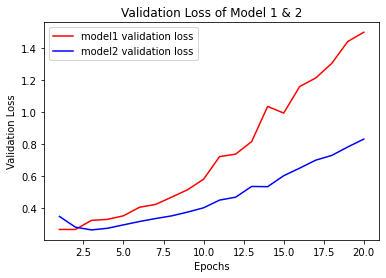

In [14]:
histplot(history, history2)

small model에서 validataion loss가 느리게 올라가는 것을 볼 수 있음.

In [15]:
smodel = models.Sequential()
smodel.add(layers.Dense(512, activation='relu', input_shape = (10000, )))
smodel.add(layers.Dense(512, activation='relu'))
smodel.add(layers.Dense(1, activation='sigmoid'))

smodel.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history2 = smodel.fit(partial_x_train, partial_y_train, batch_size=128, epochs= 20, validation_data=(x_val, y_val), verbose=0)

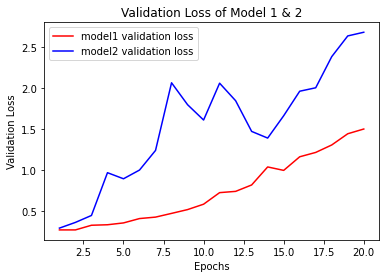

In [16]:
histplot(history, history2)

large 모델이 과대적합이 빠르게 심해지는 것을 볼 수 있다.

### 가중치 규제(Regularization)
- 가중치 값이 커지는 것에 패널티를 더하는 방식이다.
- L1 규제, L2 규제가 있음.


In [17]:
# Regularizer 구현은 이렇게 한다.
from keras import regularizers

lmodel = models.Sequential()
lmodel.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001), input_shape = (10000, )))
lmodel.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
lmodel.add(layers.Dense(1, activation='sigmoid'))

lmodel.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history3 = lmodel.fit(partial_x_train, partial_y_train, batch_size=128, epochs= 20, validation_data=(x_val, y_val), verbose=0)

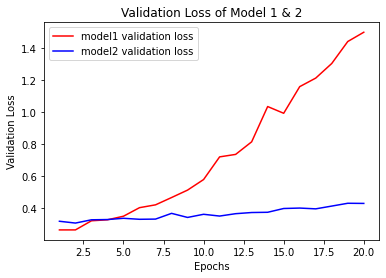

In [19]:
histplot(history, history3)

L2 정규화를 시킨 model이 epoch 수가 늘었을 때도 overfitting이 많이 일어나지 않았음을 볼 수 있다.

### 드롭아웃
- 무작위로 어느 층의 특성을 제외시키는 것. 출력 벡터의 일부가 무작위로 선택되어 아예 0이 되어버림.


In [21]:
# Dropout 구현
# 어느 층의 출력 바로 뒤에 Dropout 층을 넣어 주면 됨.


lmodel = models.Sequential()
lmodel.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001), input_shape = (10000, )))
lmodel.add(layers.Dropout(0.5))
lmodel.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
lmodel.add(layers.Dropout(0.5))
lmodel.add(layers.Dense(1, activation='sigmoid'))


lmodel.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history4 = lmodel.fit(partial_x_train, partial_y_train, batch_size=128, epochs= 20, validation_data=(x_val, y_val), verbose=0)

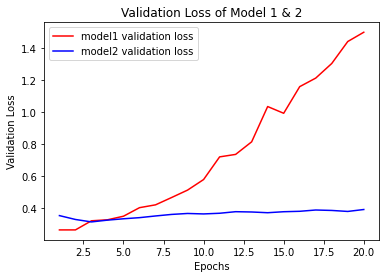

In [22]:
histplot(history, history4)

이 쪽도 훌륭하게 과대적합을 피했다.

In [24]:
y_test = np.asarray(test_label).astype('float32')

model.evaluate(x_test, y_test)  # 일반 DNN 모델
smodel.evaluate(x_test, y_test) # param 컸던 모델
lmodel.evaluate(x_test, y_test) # Dropout 적용

782/782 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8684


[0.40011730790138245, 0.868399977684021]

신기하게도 평가 당시엔 안 좋았던 large model이 accuracy는 잘 나왔다.